Sample 1 and 2 mixed

In [ ]:
!pip install pandas matplotlib seaborn numpy scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [11]:
df=pd.read_csv('C:\\Users\\mehno\\OneDrive\\Documents\\Python Practice\\Data Science Practical\\student.csv')
df.head(10)

,Name,Age,Attendance,Study Hours,CGPA,Department
0,Ayesha,21,85,NaN,3.6,Software Engineering
1,Fatima,22,78,3.8,3.2,Computer Science
2,Hina,21,90,5.2,3.9,Software Engineering
3,Sara,23,65,2.5,2.7,Information Technology
4,Zainab,22,70,3.0,2.9,Computer Science
5,Maryam,21,95,6.0,3.8,Software Engineering
6,Iqra,24,60,2.0,2.4,Information Technology
7,Noor,22,88,4.8,3.5,Computer Science
8,Laiba,21,72,3.2,3.0,Software Engineering
9,Anum,23,68,2.7,2.6,Information Technology


In [12]:
df.shape
df.columns
df.describe()

,Age,Attendance,Study Hours,CGPA
count,15.000000,15.000000,14.000000,15.000000
mean,22.133333,77.000000,3.742857,3.160000
std,1.060099,11.994046,1.304262,0.548765
min,21.000000,55.000000,1.800000,2.100000
25%,21.000000,69.000000,2.775000,2.800000
50%,22.000000,78.000000,3.700000,3.200000
75%,23.000000,86.500000,4.675000,3.550000
max,24.000000,95.000000,6.000000,3.900000


In [13]:
df.isnull().sum()

Name           0
Age            0
Attendance     0
Study Hours    1
CGPA           0
Department     0
dtype: int64

In [14]:
df['Study Hours'].fillna(df['Study Hours'].mean(), inplace=True)

C:\Users\mehno\AppData\Local\Temp\ipykernel_10396\320298270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Hours'].fillna(df['Study Hours'].mean(), inplace=True)


In [15]:
df.isnull().sum()

Name           0
Age            0
Attendance     0
Study Hours    0
CGPA           0
Department     0
dtype: int64

In [16]:
df['Department'] = df['Department'].astype('category')

Task 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


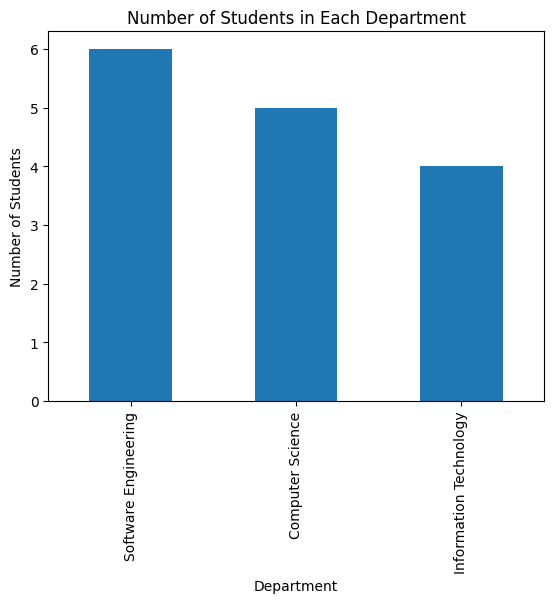

In [18]:
df['Department'].value_counts().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each Department')
plt.show()

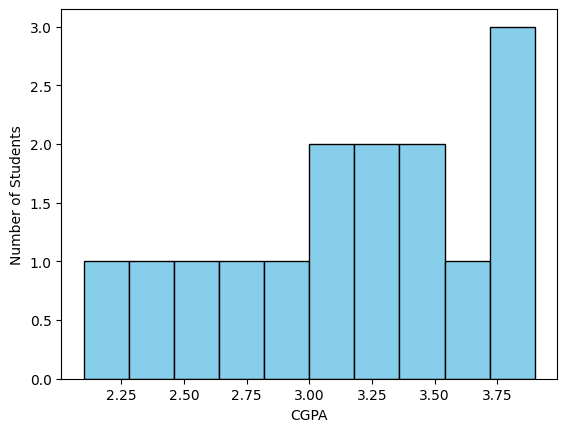

In [19]:
plt.hist(df['CGPA'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('CGPA')  
plt.ylabel('Number of Students')
plt.show()

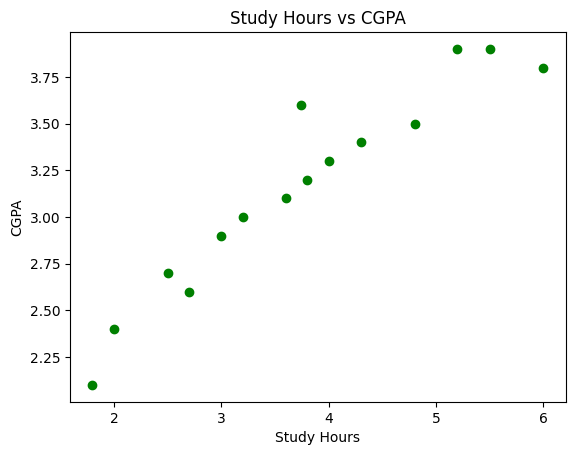

In [20]:
plt.scatter(df['Study Hours'], df['CGPA'], color='green')
plt.xlabel('Study Hours')
plt.ylabel('CGPA')
plt.title('Study Hours vs CGPA')
plt.show()

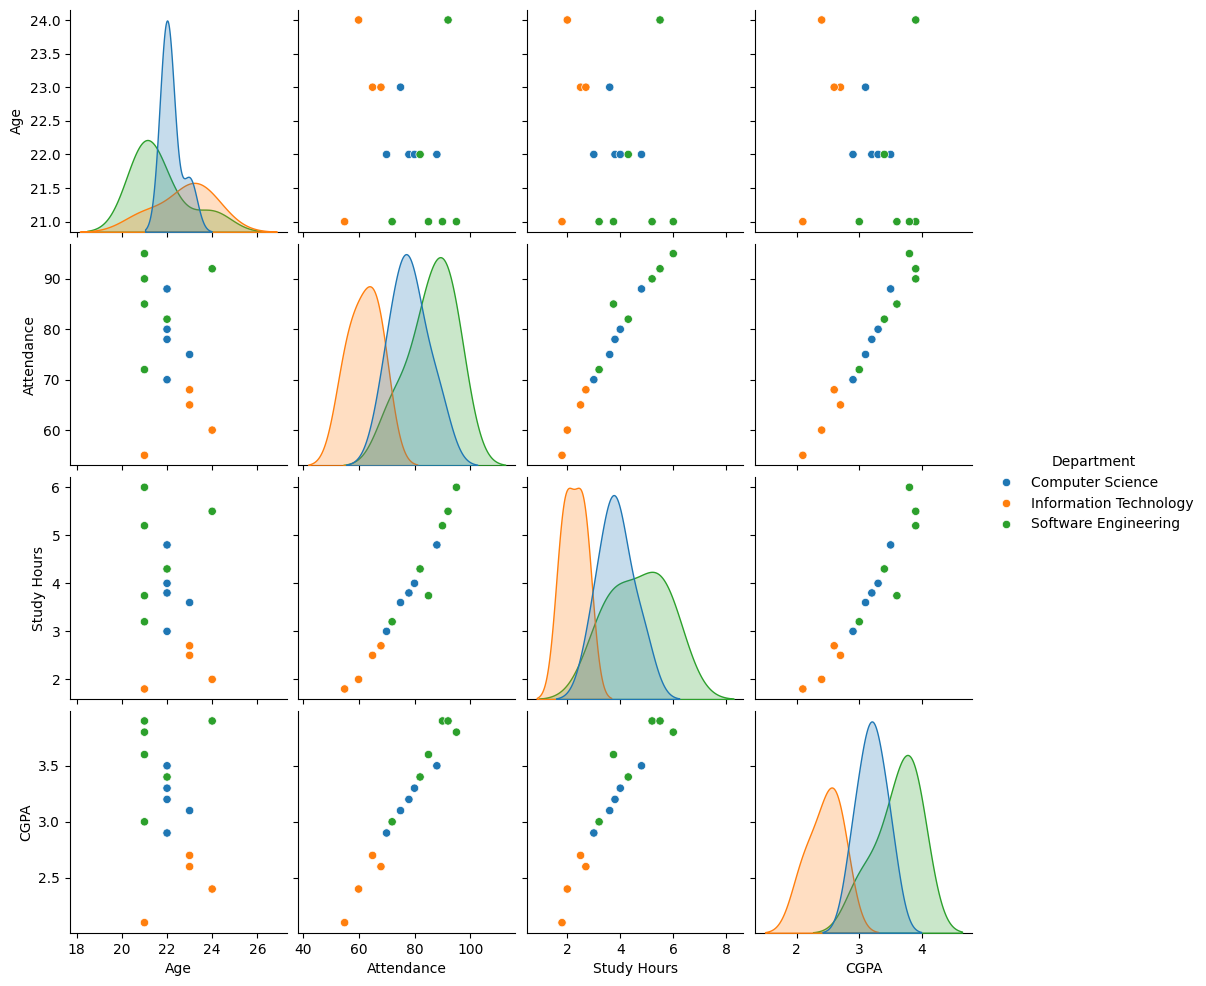

In [21]:
sns.pairplot(df, hue='Department')
plt.show()

Task 3

In [22]:
X=df[['Age','Attendance','Study Hours']]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled=scaler.fit_transform(X)

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(X_scaled)

In [25]:
df['ClusterLabel'] = clusters
df.head()

,Name,Age,Attendance,Study Hours,CGPA,Department,ClusterLabel
0,Ayesha,21,85,3.742857,3.6,Software Engineering,0
1,Fatima,22,78,3.800000,3.2,Computer Science,1
2,Hina,21,90,5.200000,3.9,Software Engineering,0
3,Sara,23,65,2.500000,2.7,Information Technology,2
4,Zainab,22,70,3.000000,2.9,Computer Science,2


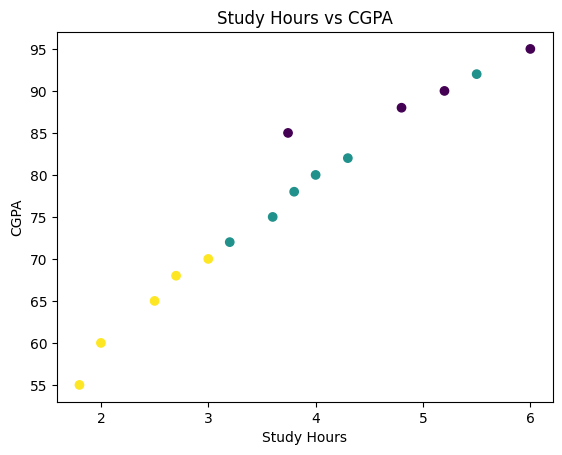

In [27]:
plt.scatter(df['Study Hours'], df['Attendance'], c=df['ClusterLabel'])
plt.xlabel('Study Hours')
plt.ylabel('CGPA')
plt.title('Study Hours vs CGPA')
plt.show()

Task 4

Feature Creation

In [28]:
df['Study Hours Label']=df['Study Hours'].apply(lambda x: 1 if x>=df['Study Hours'].mean() else 0)


In [32]:
from sklearn.model_selection import train_test_split
X=df[['Age','Attendance','CGPA']]
y=df[['Study Hours Label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[2 0]
 [0 1]]


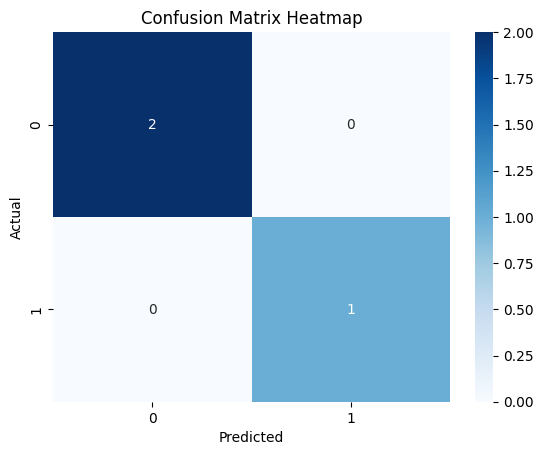

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Task 5

In [36]:
from sklearn.ensemble import RandomForestRegressor
X=df[['Study Hours','Attendance','Age']]
y=df[['CGPA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
predictions=rf_model.predict(X_test)

c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R² Score: 0.6113268571428577
Mean Absolute Error: 0.356666666666666
Mean Squared Error: 0.15115066666666646


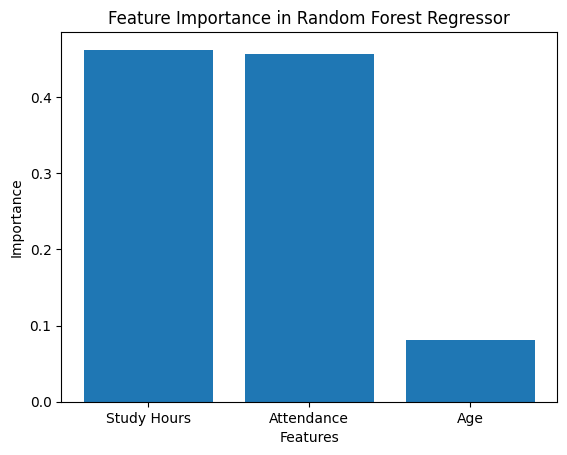

In [38]:
importance=rf_model.feature_importances_
plt.bar(X.columns, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

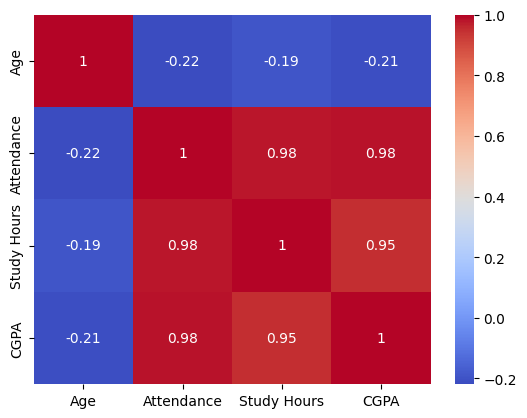

In [39]:
corr_matrix=df[['Age','Attendance','Study Hours','CGPA']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

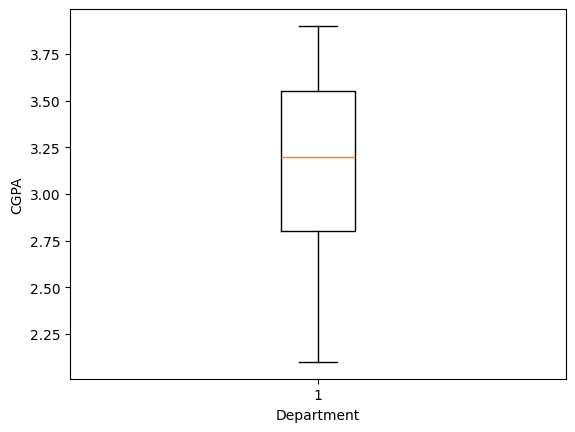

In [41]:
plt.boxplot(df['CGPA'], data=df)
plt.xlabel('Department')
plt.ylabel('CGPA')
plt.show()

In [45]:
def performance_level(cgpa):
    if cgpa >= 3.5:
        return 'Excellent'
    elif cgpa >= 2.5:
        return 'Good'
    elif cgpa >= 1.5:
        return 'Average'
    else:
        return 'Poor'
    
df['Performance Level'] = df['CGPA'].apply(performance_level)  
df.head()

,Name,Age,Attendance,Study Hours,CGPA,Department,ClusterLabel,Study Hours Label,Performance Level
0,Ayesha,21,85,3.742857,3.6,Software Engineering,0,1,Excellent
1,Fatima,22,78,3.800000,3.2,Computer Science,1,1,Good
2,Hina,21,90,5.200000,3.9,Software Engineering,0,1,Excellent
3,Sara,23,65,2.500000,2.7,Information Technology,2,0,Good
4,Zainab,22,70,3.000000,2.9,Computer Science,2,0,Good


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Performance Level']=le.fit_transform(df['Performance Level'])
df.head()

,Name,Age,Attendance,Study Hours,CGPA,Department,ClusterLabel,Study Hours Label,Performance Level
0,Ayesha,21,85,3.742857,3.6,Software Engineering,0,1,1
1,Fatima,22,78,3.800000,3.2,Computer Science,1,1,2
2,Hina,21,90,5.200000,3.9,Software Engineering,0,1,1
3,Sara,23,65,2.500000,2.7,Information Technology,2,0,2
4,Zainab,22,70,3.000000,2.9,Computer Science,2,0,2


In [48]:
from sklearn.preprocessing import MinMaxScaler
le = MinMaxScaler()
df['Study Hours']=le.fit_transform(df[['Study Hours']])
df.head()

,Name,Age,Attendance,Study Hours,CGPA,Department,ClusterLabel,Study Hours Label,Performance Level
0,Ayesha,21,85,0.462585,3.6,Software Engineering,0,1,1
1,Fatima,22,78,0.476190,3.2,Computer Science,1,1,2
2,Hina,21,90,0.809524,3.9,Software Engineering,0,1,1
3,Sara,23,65,0.166667,2.7,Information Technology,2,0,2
4,Zainab,22,70,0.285714,2.9,Computer Science,2,0,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_cls = df[['Attendance', 'Study Hours', 'CGPA']]
y_cls = df['Performance Level']

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#ensemble library


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_cls = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_cls))
print(classification_report(y_test, y_pred_cls))


[[1 0 0]
 [0 0 1]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

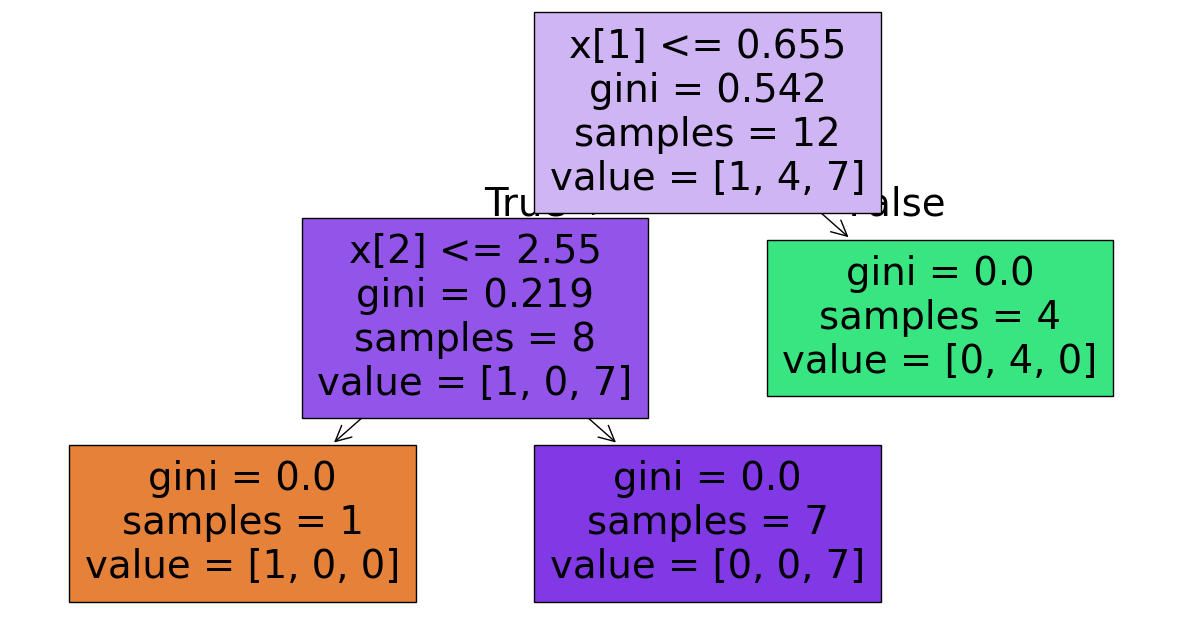

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(dt, filled=True)
plt.show()


In [ ]:
importance= dt.feature_importances_
plt.bar(X_cls.columns, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

                                                Sample paper 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('C:\\Users\\mehno\\OneDrive\\Documents\\Python Practice\\Data Science Practical\\medical.csv')
df.head(10)

,PatientID,Age,BMI,BloodPressure,Cholesterol,GlucoseLevel,Gender,Diagnosis
0,P001,45.0,28.5,130.0,210.0,140.0,Male,Positive
1,P002,52.0,31.2,145.0,240.0,160.0,Female,Positive
2,P003,38.0,24.8,120.0,190.0,110.0,Female,Negative
3,P004,60.0,NaN,150.0,260.0,180.0,Male,Positive
4,P005,29.0,22.5,115.0,170.0,NaN,Female,Negative
5,P006,47.0,27.3,135.0,200.0,145.0,Male,Positive
6,P007,55.0,30.1,148.0,235.0,155.0,NaN,Positive
7,P008,42.0,26.0,128.0,205.0,138.0,Female,Negative
8,P009,35.0,23.4,118.0,180.0,105.0,Male,Negative
9,P010,63.0,32.8,160.0,280.0,195.0,Female,Positive


In [15]:
df.isnull().sum()

PatientID        0
Age              1
BMI              1
BloodPressure    1
Cholesterol      1
GlucoseLevel     1
Gender           1
Diagnosis        0
dtype: int64

In [29]:
cols=df[['Age','BMI','GlucoseLevel','BloodPressure','Cholesterol']]
for c in cols:
    df[c].fillna(df[c].mean(), inplace=True)
    
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace=True)
df['Diagnosis'].fillna(df['Diagnosis'].mode().iloc[0], inplace=True)


df.isnull().sum()

C:\Users\mehno\AppData\Local\Temp\ipykernel_13460\3963377698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mean(), inplace=True)
C:\Users\mehno\AppData\Local\Temp\ipykernel_13460\3963377698.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

PatientID        0
Age              0
BMI              0
BloodPressure    0
Cholesterol      0
GlucoseLevel     0
Gender           0
Diagnosis        0
dtype: int64

In [30]:
df['Diagnosis']=df['Diagnosis'].map({'Positive':1,'Negative':0})

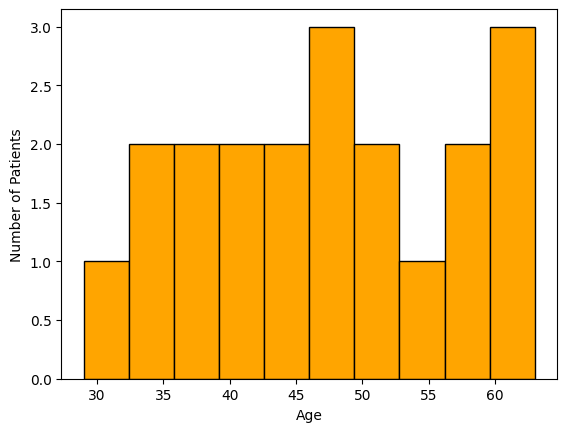

In [19]:
plt.hist(df['Age'],bins=10, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

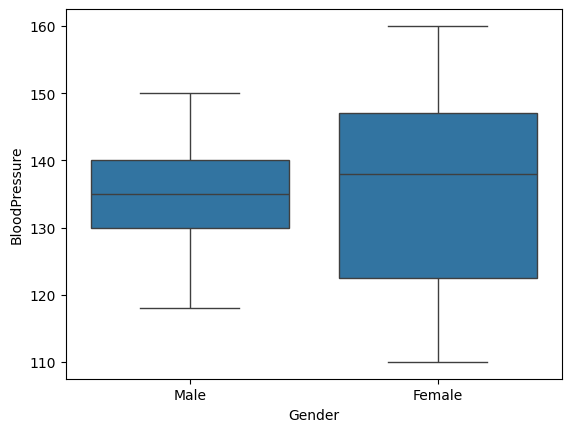

In [20]:
sns.boxplot(x='Gender', y='BloodPressure', data=df)
plt.show()

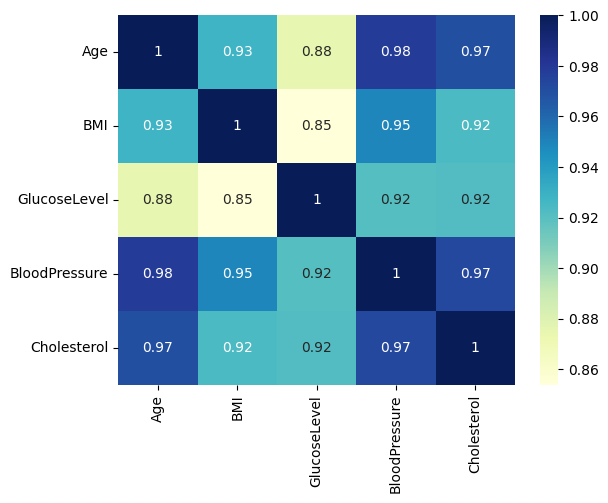

In [21]:
sns.heatmap(df[['Age','BMI','GlucoseLevel','BloodPressure','Cholesterol']].corr(), annot=True, cmap='YlGnBu')
plt.show()

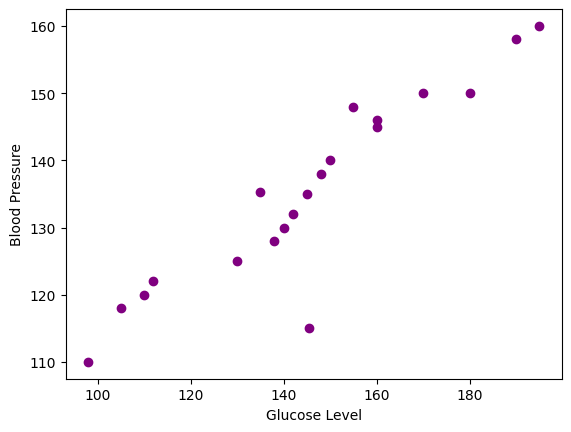

In [ ]:
plt.scatter(df['GlucoseLevel'], df['BloodPressure'], color='purple')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.show()

In [31]:
df['RiskScore']=0.3*df['BMI']+0.4*df['GlucoseLevel']+0.3*df['Cholesterol']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

df['Glucose_norm']=scalar.fit_transform(df[['GlucoseLevel']])


In [33]:
df=pd.get_dummies(df,columns=['Gender'], drop_first=True)
df.head()

,PatientID,Age,BMI,BloodPressure,Cholesterol,GlucoseLevel,Diagnosis,RiskScore,Glucose_norm,Gender_Male
0,P001,45.0,28.500000,130.0,210.0,140.000000,1,127.550000,0.432990,True
1,P002,52.0,31.200000,145.0,240.0,160.000000,1,145.360000,0.639175,False
2,P003,38.0,24.800000,120.0,190.0,110.000000,0,108.440000,0.123711,False
3,P004,60.0,27.689474,150.0,260.0,180.000000,1,158.306842,0.845361,True
4,P005,29.0,22.500000,115.0,170.0,145.421053,0,115.918421,0.488877,False


In [34]:
from sklearn.model_selection import train_test_split
X=df[['Age','BMI','BloodPressure','Cholesterol','GlucoseLevel','RiskScore','Glucose_norm']]
y=df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
print(f"F1 score: {f1_score(y_test,y_pred)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: {classification_report(y_test,y_pred)}")

F1 score: 1.0
Accuracy: 1.0
Confusion Matrix: [[4]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



c:\Users\mehno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Sample 4